# Coding Temple's Data Analytics Program
---
## Python for DA: Weekend Project

For this weekend project, you will be connecting to the [Disney API](https://disneyapi.dev/) to create an ETL pipeline. Your project should contain:

- etl_pipeline.py
    - Loads in data from the API object for all characters
    - Stores required fields from the API to a DataFrame
        - name
        - all movies/shows the character appeared in
        - any allies
        - any enemies
        - any park attractions
    - Cleans the data
    - Performs any transformations/feature engineering you wish to complete
    - Stores the data in an ElephantSQL server
    - Stores the data in a .csv file

- notebook.ipynb
    - Contains all cells you used to test your code before loading it into the pipeline
    - Loads in the data from your .csv file
    - Conduct EDA through data
    - Conduct an analysis on your dataset!

In [ ]:
import seaborn as sns, pandas as pd, requests, matplotlib.pyplot as plt, plotly.express as px



In [57]:
url = 'https://api.disneyapi.dev/character'
response = requests.get(url)
my_character_data = response.json()['data']
my_character_data
result = pd.DataFrame.from_dict(my_character_data)
variable = "".join('[Hercules (TV series)]')
my_character_data.append(variable)
my_character_data


[{'_id': 112,
  'films': ['Hercules (film)'],
  'shortFilms': [],
  'tvShows': ['Hercules (TV series)'],
  'videoGames': ['Kingdom Hearts III'],
  'parkAttractions': [],
  'allies': [],
  'enemies': [],
  'sourceUrl': 'https://disney.fandom.com/wiki/Achilles_(Hercules)',
  'name': 'Achilles',
  'imageUrl': 'https://static.wikia.nocookie.net/disney/images/d/d3/Vlcsnap-2015-05-06-23h04m15s601.png',
  'createdAt': '2021-04-12T01:31:30.547Z',
  'updatedAt': '2021-12-20T20:39:18.033Z',
  'url': 'https://api.disneyapi.dev/characters/112',
  '__v': 0},
 {'_id': 18,
  'films': ['The Fox and the Hound', 'The Fox and the Hound 2'],
  'shortFilms': [],
  'tvShows': [],
  'videoGames': [],
  'parkAttractions': [],
  'allies': [],
  'enemies': [],
  'sourceUrl': 'https://disney.fandom.com/wiki/Abigail_the_Cow',
  'name': 'Abigail the Cow',
  'imageUrl': 'https://static.wikia.nocookie.net/disney/images/0/05/Fox-disneyscreencaps_com-901.jpg',
  'createdAt': '2021-04-12T01:26:03.413Z',
  'updatedAt': 

In [185]:
import plotly.express as px, pandas as pd
url = 'https://api.disneyapi.dev/character'
response = requests.get(url)
# Now, to store required fields from API into a DataFrame
my_character_data = response.json()['data']
# Step 1: Create variable for each required column
names = [my_character_data[x]['name'] for x in range(len(my_character_data))] # Name
tv_shows = [my_character_data[x]['tvShows'] for x in range(len(my_character_data))] # Tv Shows
allies = [my_character_data[x]['allies'] for x in range(len(my_character_data))] # Checked, no allies listed in dict
enemies = [my_character_data[x]['enemies'] for x in range(len(my_character_data))]
films = [my_character_data[x]['films'] for x in range(len(my_character_data))] # films listed in dict
short_films = [my_character_data[x]['shortFilms'] for x in range(len(my_character_data))]
park_attractions = [my_character_data[x]['parkAttractions'] for x in range(len(my_character_data))] # Park Attractions
# Step 2: Create dictionary with each available variable
my_character_dict = {
'names': names,
'tv_shows': [', '.join(shows) if shows else ' ' for shows in tv_shows],
'films': [','.join(film) if film else ' ' for film in films],
'shortFilms': [','.join(shorts) if shorts else ' ' for shorts in short_films],
'allies': [','.join(ally) if ally else ' ' for ally in allies],
'enemies': [','.join(enemy) if enemy else ' ' for enemy in enemies],
'park_attractions': [', '.join(attractions) if attractions else ' ' for attractions in park_attractions]
}
# Step 3: Convert Dictionary to DataFrame
df = pd.DataFrame.from_dict(my_character_dict)
df.describe()
# display(df.groupby(['Achilles']).count())
result = df[(df['names'] == 'Baloo')]
# result2 = result.sort_values('films', ascending=False).reset_index(drop=True).head(1)
# display(result)
df
result.head()
tv_shows = 0
films = 0
# park_attractions = 0
# def baloo_dict():
    
# tv_shows1 = 0
# films1 = 0
# park_attractions1 = 0 
# for num in result():
#     for show in tv_shows:
#          tv_shows1 += 1
#     for film in films:
#         films1 += 1
#     for park_attraction in park_attractions:
#         park_attractions1 += 1
# new_dict = {
#         'name': 'Baloo',
#         'tv_show_count': tv_shows1,
#         'film_count': films1,
#         'park_attractions': park_attractions1

#     }
# pd.DataFrame.from_dict(new_dict)

# px.bar(df)
# result3= result.sum()
# pd.DataFrame.from_dict(result3)
# results3 = result.loc[['tv_shows','films','park_attractions']].sum()

# result
# result2 = result['park_attractions'].sum()
# result2 = sum(result['park_attractions'])
# result.loc['Total'] = pd.Series(df['park_attractions'].sum(), index=['park_attractions'])
# result
result.loc['Total'] = result.count()
result

# result.loc['Total', 'park_attractions'] = result.park_attractions.sum()
# result.at['Total', 'park_attractions'] = result['park_attractions'].sum()
# results4 = result.append(pd.DataFrame(result.park_attractions.sum(), index=['Total'], columns=['park_attractions']))
# results4

/var/folders/qb/kypsbnkd3x17lyrmt3wfgwph0000gn/T/ipykernel_17175/3921077630.py:67: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,names,tv_shows,films,shortFilms,allies,enemies,park_attractions
28,Baloo,"The Mouse Factory, TaleSpin, Raw Toonage, Alad...","The Jungle Book,The Jungle Book 2,Rudyard Kipl...",,,,"The Disney Afternoon Live!: Plane Crazy, Micke..."
Total,1,1,1,1,1,1,1


In [218]:
new_show = []
for value in df['tv_shows'][df['names'] == 'Baloo']:
    new_show.append(value.split(','))
total_amt_of_shows = len(new_show[0])
new_film = []
for value in df['films'][df['names'] == 'Baloo']:
    new_film.append(value.split(','))
    print(len(new_film[0]))
# short_films = []
# for value in df['shortFilms'][df['names'] == 'Baloo']:
#     short_films.append(value.split(','))
#     print(len(short_films[0]))
park_attractions = []
for value in df['park_attractions'][df['names'] == 'Baloo']:
    park_attractions.append(value.split(','))
    print(len(park_attractions[0]))
    baloo_dict = {
        'name': 'Baloo',
        'total_number_of_tvshows': total_amt_of_shows,


    }

7
9
14


In [171]:
results3 = result.iloc[1:].sum()
results3

names               0
tv_shows            0
films               0
shortFilms          0
allies              0
enemies             0
park_attractions    0
dtype: object

In [132]:
px.box(df)

,names,tv_shows,films,shortFilms,allies,enemies,park_attractions
47,Archibald Smelding,,,,,,Tower of Terror
13,Arabella Smith,,,,,,Tortuga Tavern
35,Beheaded Knight,,The Haunted Mansion (film),,,,The Haunted Mansion


(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

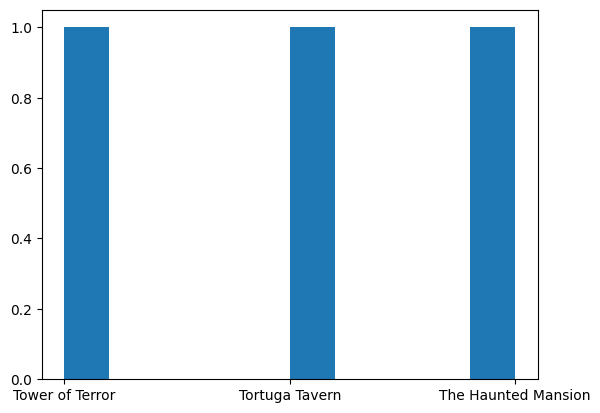

In [108]:
# # plt.hist('park_attractions', data=df1)
# # plt.xlabel('Park Attractions');
# # plt.ylabel('Frequency');
# sns.pairplot(df, y_vars=['tv_shows'])

result = df.sort_values('park_attractions', ascending=False).head(3)
# result2 = result.sort_values('films', ascending=False).reset_index(drop=True).head(1)
display(result)
key = result['park_attractions'].tolist()


In [138]:
display(df['park_attractions'].max()) # Tower of Terror


'Tower of Terror'

In [141]:
df.groupby(['park_attractions']).size().reset_index(name='count')

,park_attractions,count
0,,46
1,"The Disney Afternoon Live!: Plane Crazy, Micke...",1
2,The Haunted Mansion,1
3,Tortuga Tavern,1
4,Tower of Terror,1


In [142]:
df.groupby(['park_attractions']).count()

,names,tv_shows,films,shortFilms,allies,enemies
park_attractions,,,,,,
,46,46,46,46,46,46
"The Disney Afternoon Live!: Plane Crazy, Mickey's Magical TV World, Fantasmic!, It's a Small World, Mickey Mouse Revue, Celebrate a Dreams Come True Parade, Mickey's Jammin' Jungle Parade, Mickey's Jingle Jungle Parade, Disney Stars and Motorcars Parade, Parade of the Stars, World of Color, Mickey and the Wondrous Book, La Forêt de l'Enchantement: Une aventure musicale Disney, Happily Ever After (fireworks show)",1,1,1,1,1,1
The Haunted Mansion,1,1,1,1,1,1
Tortuga Tavern,1,1,1,1,1,1
Tower of Terror,1,1,1,1,1,1


In [152]:
result = df.describe()
result

,names,tv_shows,films,shortFilms,allies,enemies,park_attractions
count,50,50,50,50,50,50,50
unique,50,22,21,1,1,1,5
top,Achilles,,,,,,
freq,1,26,28,50,50,50,46


,names,tv_shows,films,shortFilms,allies,enemies,park_attractions
